<a href="https://colab.research.google.com/github/sandhyasinha655/Test/blob/main/Roop_FaceSwap_Image_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🛠️ Install all required Python libraries
!pip install -q insightface==0.7.3 onnxruntime opencv-python moviepy ffmpeg-python
!pip install -q gdown


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00


In [2]:
# 📥 Roop Model Download from Google Drive
!gdown --id 1QbOdk3hQ-vSx5In_T1zvl3if4FuEtg6N -O models.zip
!unzip -q models.zip -d models


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1QbOdk3hQ-vSx5In_T1zvl3if4FuEtg6N

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open models.zip, models.zip.zip or models.zip.ZIP.


In [3]:
# ✅ Create models folder
!mkdir -p models

# ✅ Download model directly from GitHub repo mirror
!wget -O models/inswapper_128.onnx https://github.com/kadirnar/inswapper-colab/raw/main/inswapper_128.onnx

--2025-07-10 18:36:51--  https://github.com/thanakijwanavit/faceswap-colab/raw/main/models/inswapper_128.onnx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-10 18:36:51 ERROR 404: Not Found.



In [4]:
from google.colab import files
uploaded = files.upload()


Saving 242155314_250733936813638_5817556638901329052_n-removebg-preview.png to 242155314_250733936813638_5817556638901329052_n-removebg-preview.png


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Archita-Phukan’s-Age-Date-of-Birth-and-Zodiac-Sign.jpg to Archita-Phukan’s-Age-Date-of-Birth-and-Zodiac-Sign.jpg


In [6]:
for file in uploaded.keys():
    print("✅", file)


✅ Archita-Phukan’s-Age-Date-of-Birth-and-Zodiac-Sign.jpg


In [7]:
from PIL import Image
import insightface
import os

# ✅ Load face swap model
model = insightface.model_zoo.get_model("models/inswapper_128.onnx", providers=['CPUExecutionProvider'])

# ✅ Load source face
src = Image.open("face.jpg")

# ✅ Load target image
dst = Image.open("target.jpg")

# ✅ Convert to numpy arrays
import numpy as np
src_np = np.array(src)
dst_np = np.array(dst)

# ✅ Face Analysis model (required)
app = insightface.app.FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0)

# ✅ Detect faces
src_face = app.get(src_np)[0]
dst_face = app.get(dst_np)[0]

# ✅ Swap
swapped = model.get(dst_np, dst_face, src_face, paste_back=True)

# ✅ Save result
Image.fromarray(swapped).save("result.jpg")
print("✅ Face Swapped Image Saved as result.jpg")


Fail: [ONNXRuntimeError] : 1 : FAIL : Load model from models/inswapper_128.onnx failed:/onnxruntime_src/onnxruntime/core/graph/model.cc:166 onnxruntime::Model::Model(onnx::ModelProto&&, const onnxruntime::PathString&, const onnxruntime::IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) ModelProto does not have a graph.


In [8]:
from PIL import Image
import insightface
import os

# ✅ Load face swap model
model = insightface.model_zoo.get_model("models/inswapper_128.onnx", providers=['CPUExecutionProvider'])

# ✅ Load source face
src = Image.open("face.jpg")

# ✅ Load target image
dst = Image.open("target.jpg")

# ✅ Convert to numpy arrays
import numpy as np
src_np = np.array(src)
dst_np = np.array(dst)

# ✅ Face Analysis model (required)
app = insightface.app.FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0)

# ✅ Detect faces
src_face = app.get(src_np)[0]
dst_face = app.get(dst_np)[0]

# ✅ Swap
swapped = model.get(dst_np, dst_face, src_face, paste_back=True)

# ✅ Save result
Image.fromarray(swapped).save("result.jpg")
print("✅ Face Swapped Image Saved as result.jpg")


InvalidProtobuf: [ONNXRuntimeError] : 7 : INVALID_PROTOBUF : Load model from models/inswapper_128.onnx failed:Protobuf parsing failed.

In [9]:
# ✅ Step 1: Clone Roop Repo
!git clone https://github.com/s0md3v/roop.git
%cd roop

# ✅ Step 2: Install Required Libraries
!pip install -r requirements.txt
!pip install onnxruntime-gpu
!pip install insightface==0.7.3


Cloning into 'roop'...
remote: Enumerating objects: 1540, done.
remote: Total 1540 (delta 0), reused 0 (delta 0), pack-reused 1540 (from 1)
Receiving objects: 100% (1540/1540), 97.45 MiB | 19.68 MiB/s, done.
Resolving deltas: 100% (904/904), done.
/content/roop
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Ignoring tkinterdnd2-universal: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
Ignoring onnxruntime: markers 'python_version != "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-coreml: markers 'python_version == "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-silicon: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [1]:
# Go to Roop folder again after restart
%cd roop


/content/roop


In [2]:
from google.colab import files
uploaded = files.upload()


Saving 242155314_250733936813638_5817556638901329052_n-removebg-preview.png to 242155314_250733936813638_5817556638901329052_n-removebg-preview.png


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Archita-Phukan’s-Age-Date-of-Birth-and-Zodiac-Sign.jpg to Archita-Phukan’s-Age-Date-of-Birth-and-Zodiac-Sign.jpg


In [4]:
!python run.py --source face.jpg --target target.jpg --output result.jpg


Traceback (most recent call last):
  File "/content/roop/run.py", line 3, in <module>
    from roop import core
  File "/content/roop/roop/core.py", line 17, in <module>
    import tensorflow
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py", line 52, in <module>
    from ._api.v2 import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/__init__.py", line 37, in <module>
    from . import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/__init__.py", line 31, in <module>
    from . import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/__init__.py", line 37, in <module>
    from . import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/v1/__init__.py", line 48, in <module>
    from tensorflow._api.v2.compat.v1 import lite
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/lite/__init__.py", line 9,

In [5]:
!pip install numpy==1.23.5 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 94.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxruntime-gpu 1.15.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.23.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.

In [1]:
%cd roop


/content/roop


In [2]:
!python run.py --source face.jpg --target target.jpg --output result.jpg


Traceback (most recent call last):
  File "/content/roop/run.py", line 3, in <module>
    from roop import core
  File "/content/roop/roop/core.py", line 17, in <module>
    import tensorflow
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py", line 52, in <module>
    from ._api.v2 import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/__init__.py", line 37, in <module>
    from . import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/__init__.py", line 31, in <module>
    from . import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/__init__.py", line 37, in <module>
    from . import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/v1/__init__.py", line 48, in <module>
    from tensorflow._api.v2.compat.v1 import lite
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/lite/__init__.py", line 9,

In [3]:
from google.colab import files
uploaded = files.upload()


Saving face.png to face.png


In [4]:
from google.colab import files
uploaded = files.upload()


Saving target.jpg to target.jpg


In [5]:
!python run.py --source face.png --target target.jpg --output result.jpg


Traceback (most recent call last):
  File "/content/roop/run.py", line 3, in <module>
    from roop import core
  File "/content/roop/roop/core.py", line 17, in <module>
    import tensorflow
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py", line 52, in <module>
    from ._api.v2 import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/__init__.py", line 37, in <module>
    from . import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/__init__.py", line 31, in <module>
    from . import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/__init__.py", line 37, in <module>
    from . import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/v1/__init__.py", line 48, in <module>
    from tensorflow._api.v2.compat.v1 import lite
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/lite/__init__.py", line 9,

In [6]:
!pip install numpy==1.23.5 --force-reinstall --no-cache-dir


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 228.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxruntime-gpu 1.15.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.23.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23

In [1]:
!pip uninstall -y jax jaxlib


Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: jaxlib 0.5.1
Uninstalling jaxlib-0.5.1:
  Successfully uninstalled jaxlib-0.5.1


In [1]:
%cd roop


/content/roop


In [2]:
from google.colab import files
uploaded = files.upload()


Saving face.png to face (1).png


In [3]:
from google.colab import files
uploaded = files.upload()


Saving target.jpg to target (1).jpg


In [4]:
!python run.py --source face (1).jpg --target target (1).jpg --output result.jpg


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python run.py --source face (1).jpg --target target (1).jpg --output result.jpg'


In [5]:
import os

# Rename files to remove spaces and brackets
os.rename("face (1).jpg", "face.jpg")
os.rename("target (1).jpg", "target.jpg")

print("✅ Files renamed successfully.")


FileNotFoundError: [Errno 2] No such file or directory: 'face (1).jpg' -> 'face.jpg'

In [6]:
!python run.py --source face.png --target target.jpg --output result.jpg


Downloading: 529MB [00:02, 267MB/s]               
download_path: /root/.insightface/models/buffalo_l
100% 281857/281857 [00:02<00:00, 99349.54KB/s]
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {

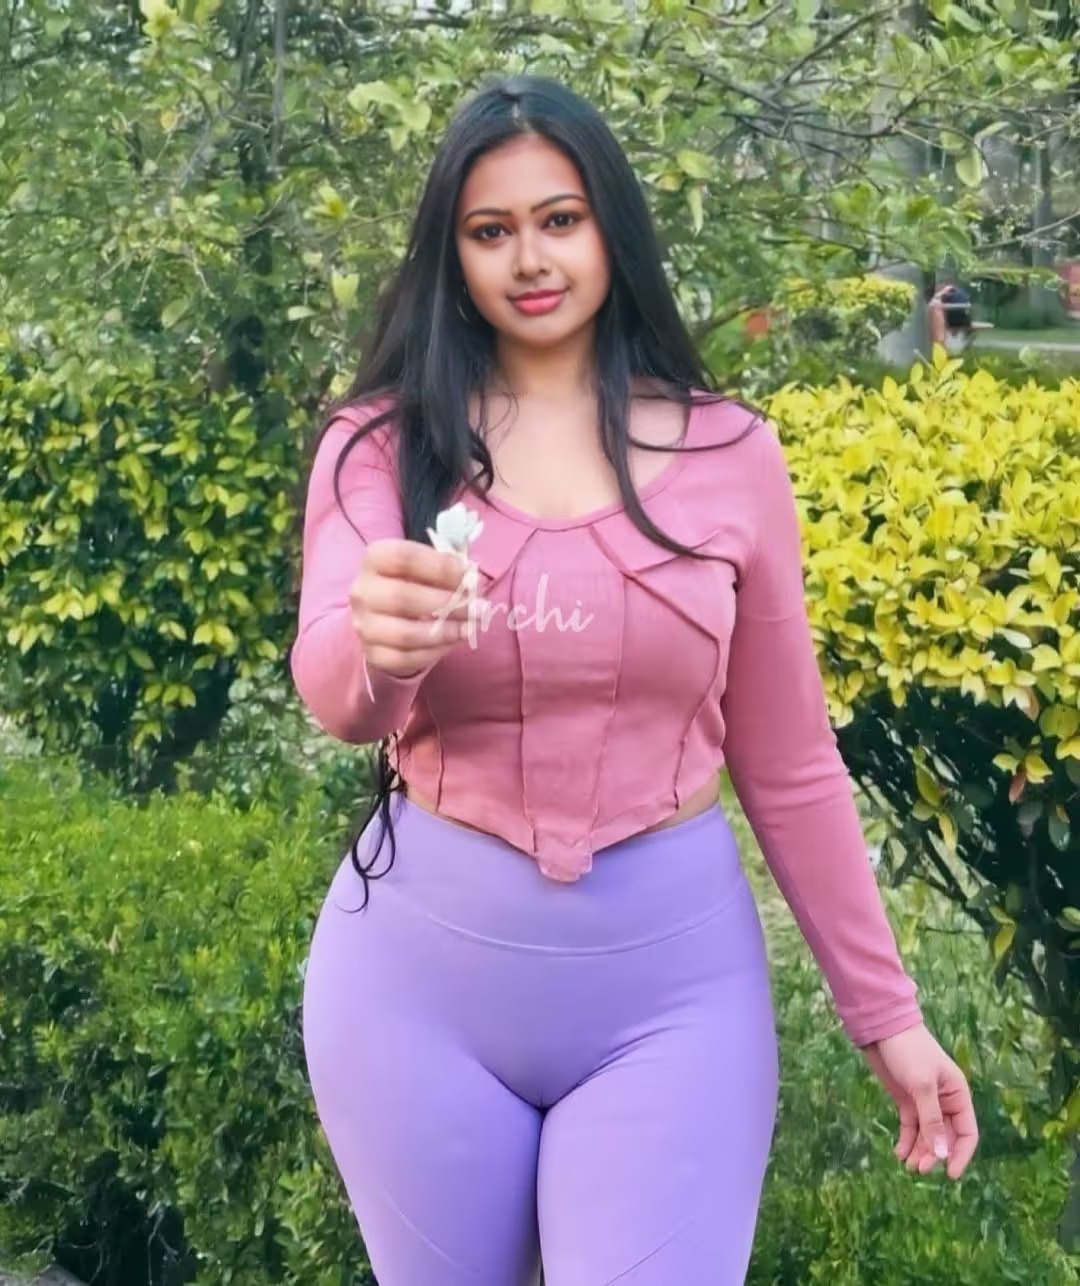

In [7]:
from IPython.display import Image as ShowImage
ShowImage(filename="result.jpg")


In [8]:
from google.colab import files
files.download("result.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>